In [1]:
# Python3 program to solve N Queen
# Problem using backtracking
global N
N = 4

def printSolution(board):
	for i in range(N):
		for j in range(N):
			print (board[i][j], end = " ")
		print()

# A utility function to check if a queen can
# be placed on board[row][col]. Note that this
# function is called when "col" queens are
# already placed in columns from 0 to col -1.
# So we need to check only left side for
# attacking queens
def isSafe(board, row, col):

	# Check this row on left side
	for i in range(col):
		if board[row][i] == 1:
			return False

	# Check upper diagonal on left side
	for i, j in zip(range(row, -1, -1),
					range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	# Check lower diagonal on left side
	for i, j in zip(range(row, N, 1),
					range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	return True

def solveNQUtil(board, col):
	
	# base case: If all queens are placed
	# then return true
	if col >= N:
		return True

	# Consider this column and try placing
	# this queen in all rows one by one
	for i in range(N):

		if isSafe(board, i, col):
			
			# Place this queen in board[i][col]
			board[i][col] = 1

			# recur to place rest of the queens
			if solveNQUtil(board, col + 1) == True:
				return True

			# If placing queen in board[i][col
			# doesn't lead to a solution, then
			# queen from board[i][col]
			board[i][col] = 0

	# if the queen can not be placed in any row in
	# this column col then return false
	return False

# This function solves the N Queen problem using
# Backtracking. It mainly uses solveNQUtil() to
# solve the problem. It returns false if queens
# cannot be placed, otherwise return true and
# placement of queens in the form of 1s.
# note that there may be more than one
# solutions, this function prints one of the
# feasible solutions.
def solveNQ():
	board = [ [0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0],
			[0, 0, 0, 0] ]

	if solveNQUtil(board, 0) == False:
		print ("Solution does not exist")
		return False

	printSolution(board)
	return True

# Driver Code
solveNQ()

# This code is contributed by Divyanshu Mehta


0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

In [2]:
from collections import deque

def BFS(a, b, target):
	
	# Map is used to store the states, every
	# state is hashed to binary value to
	# indicate either that state is visited
	# before or not
	m = {}
	isSolvable = False
	path = []
	
	# Queue to maintain states
	q = deque()
	
	# Initialing with initial state
	q.append((0, 0))

	while (len(q) > 0):
		
		# Current state
		u = q.popleft()

		#q.pop() #pop off used state

		# If this state is already visited
		if ((u[0], u[1]) in m):
			continue

		# Doesn't met jug constraints
		if ((u[0] > a or u[1] > b or
			u[0] < 0 or u[1] < 0)):
			continue

		# Filling the vector for constructing
		# the solution path
		path.append([u[0], u[1]])

		# Marking current state as visited
		m[(u[0], u[1])] = 1

		# If we reach solution state, put ans=1
		if (u[0] == target or u[1] == target):
			isSolvable = True
			
			if (u[0] == target):
				if (u[1] != 0):
					
					# Fill final state
					path.append([u[0], 0])
			else:
				if (u[0] != 0):

					# Fill final state
					path.append([0, u[1]])

			# Print the solution path
			sz = len(path)
			for i in range(sz):
				print("(", path[i][0], ",",
						path[i][1], ")")
			break

		# If we have not reached final state
		# then, start developing intermediate
		# states to reach solution state
		q.append([u[0], b]) # Fill Jug2
		q.append([a, u[1]]) # Fill Jug1

		for ap in range(max(a, b) + 1):

			# Pour amount ap from Jug2 to Jug1
			c = u[0] + ap
			d = u[1] - ap

			# Check if this state is possible or not
			if (c == a or (d == 0 and d >= 0)):
				q.append([c, d])

			# Pour amount ap from Jug 1 to Jug2
			c = u[0] - ap
			d = u[1] + ap

			# Check if this state is possible or not
			if ((c == 0 and c >= 0) or d == b):
				q.append([c, d])
		
		# Empty Jug2
		q.append([a, 0])
		
		# Empty Jug1
		q.append([0, b])

	# No, solution exists if ans=0
	if (not isSolvable):
		print ("No solution")

# Driver code
if __name__ == '__main__':
	
	Jug1, Jug2, target = 4, 3, 2
	print("Path from initial state "
		"to solution state ::")
	
	BFS(Jug1, Jug2, target)

# This code is contributed by mohit kumar 29


Path from initial state to solution state ::
( 0 , 0 )
( 0 , 3 )
( 4 , 0 )
( 4 , 3 )
( 3 , 0 )
( 1 , 3 )
( 3 , 3 )
( 4 , 2 )
( 0 , 2 )


In [1]:
def recAOStar(n):
    global finalPath
    print("Expanding Node:",n)
    and_nodes = []
    or_nodes =[]
    if(n in allNodes):
        if 'AND' in allNodes[n]:
            and_nodes = allNodes[n]['AND']
        if 'OR' in allNodes[n]:
            or_nodes = allNodes[n]['OR']
    if len(and_nodes)==0 and len(or_nodes)==0:
        return
    
    solvable = False
    marked ={}
    
    while not solvable:
        if len(marked)==len(and_nodes)+len(or_nodes):
            min_cost_least,min_cost_group_least = least_cost_group(and_nodes,or_nodes,{})
            solvable = True
            change_heuristic(n,min_cost_least)
            optimal_child_group[n] = min_cost_group_least
            continue
        min_cost,min_cost_group = least_cost_group(and_nodes,or_nodes,marked)
        is_expanded = False
        if len(min_cost_group)>1:
            if(min_cost_group[0] in allNodes):
                is_expanded = True
                recAOStar(min_cost_group[0])
            if(min_cost_group[1] in allNodes):
                is_expanded = True
                recAOStar(min_cost_group[1])
        else:
            if(min_cost_group in allNodes):
                is_expanded = True
                recAOStar(min_cost_group)
        if is_expanded:
            min_cost_verify, min_cost_group_verify = least_cost_group(and_nodes, or_nodes, {})
            if min_cost_group == min_cost_group_verify:
                solvable = True
                change_heuristic(n, min_cost_verify)
                optimal_child_group[n] = min_cost_group
        else:
            solvable = True
            change_heuristic(n, min_cost)
            optimal_child_group[n] = min_cost_group
        marked[min_cost_group]=1
    return heuristic(n)

def least_cost_group(and_nodes, or_nodes, marked):
    node_wise_cost = {}
    for node_pair in and_nodes:
        if not node_pair[0] + node_pair[1] in marked:
            cost = 0
            cost = cost + heuristic(node_pair[0]) + heuristic(node_pair[1]) + 2
            node_wise_cost[node_pair[0] + node_pair[1]] = cost
    for node in or_nodes:
        if not node in marked:
            cost = 0
            cost = cost + heuristic(node) + 1
            node_wise_cost[node] = cost
    min_cost = 999999
    min_cost_group = None
    for costKey in node_wise_cost:
        if node_wise_cost[costKey] < min_cost:
            min_cost = node_wise_cost[costKey]
            min_cost_group = costKey
    return [min_cost, min_cost_group]

def heuristic(n):
    return H_dist[n]

def change_heuristic(n, cost):
    H_dist[n] = cost
    return

def print_path(node):
    print(optimal_child_group[node], end="")
    node = optimal_child_group[node]
    if len(node) > 1:
        if node[0] in optimal_child_group:
            print("->", end="")
            print_path(node[0])
        if node[1] in optimal_child_group:
            print("->", end="")
            print_path(node[1])
    else:
        if node in optimal_child_group:
            print("->", end="")
            print_path(node)
H_dist = {
 'A': -1,
 'B': 4,
 'C': 2,
 'D': 3,
 'E': 6,
 'F': 8,
 'G': 2,
 'H': 0,
 'I': 0,
 'J': 0
}
allNodes = {
 'A': {'AND': [('C', 'D')], 'OR': ['B']},
 'B': {'OR': ['E', 'F']},
 'C': {'OR': ['G'], 'AND': [('H', 'I')]},
 'D': {'OR': ['J']}
}
optimal_child_group = {}
optimal_cost = recAOStar('A')
print('Nodes which gives optimal cost are')
print("Root node is A then path is : ")
print_path('A')
print('\nOptimal Cost is :: ', optimal_cost)

Expanding Node: A
Expanding Node: B
Expanding Node: C
Expanding Node: D
Nodes which gives optimal cost are
Root node is A then path is : 
CD->HI->J
Optimal Cost is ::  5


In [3]:
from collections import defaultdict
jug1, jug2, aim = 4,3,2

visited = defaultdict(lambda:False)
def waterJugSolver(amt1, amt2):
    if(amt1==aim and amt2==0) or (amt2==aim and amt1==0):
        print(amt1, amt2)
        return True
    
    if visited[(amt1, amt2)] == False:
        print(amt1, amt2)
        visited[(amt1, amt2)] = True
        
        return (
            waterJugSolver(0, amt2) or
            waterJugSolver(amt1, 0) or
            waterJugSolver(jug1, amt2) or
            waterJugSolver(amt1, jug2) or
            waterJugSolver(amt1 + min(amt2, (jug1-amt1)), amt2-min(amt2, (jug1-amt1))) or
            waterJugSolver(amt1 - min(amt1, (jug2-amt2)), amt2+min(amt1, (jug2-amt2))) ) 
    else: 
        return False

In [4]:
print("Steps: ")

waterJugSolver(0, 0)

Steps: 
0 0
4 0
4 3
0 3
3 0
3 3
4 2
0 2


True

In [6]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(source, target, n):
	visited = [False] * n
	visited[0] = True
	pq = PriorityQueue()
	pq.put((0, source))
	while pq.empty() == False:
		u = pq.get()[1]
		# Displaying the path having lowest cost
		print(u, end=" ")
		if u == target:
			break

		for v, c in graph[u]:
			if visited[v] == False:
				visited[v] = True
				pq.put((c, v))
	print()

# Function for adding edges to graph


def addedge(x, y, cost):
	graph[x].append((y, cost))
	graph[y].append((x, cost))


# The nodes shown in above example(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

source = 0
target = 9
best_first_search(source, target, v)

# This code is contributed by Jyotheeswar Ganne


0 1 3 2 8 9 


X= [2. 4.]


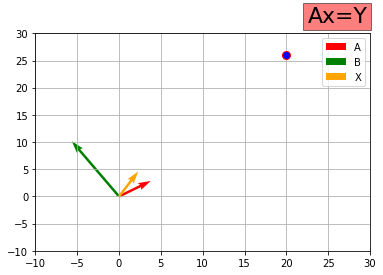

In [7]:
import numpy as np
import matplotlib.pyplot as plt

origin = [0], [0]
m_list = [[4, 3], [-5, 9]]
A = np.array(m_list)
B = np.array([20, 26])
X = np.linalg.inv(A).dot(B)

print("X=",X)
# plt.rcParams["figure.figsize"] = (20,20)
plt.quiver(*origin, *m_list[0],scale=1,color='r',units='xy',label='A',angles="xy")
plt.quiver(*origin, *m_list[1],scale=1,color='g',units='xy',label='B',angles="xy")
# plt.quiver(*origin, *B,scale=1,color='b',units='xy',label='Coeff')
plt.plot(20, 26, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="blue")
plt.quiver(*origin, *X,scale=1,color='orange',units='xy',label='X',angles="xy")
plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.text(22.5, 32, 'Ax=Y', fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
plt.grid()
plt.legend()
plt.show()